# Boundless GAN for image extension

Paper [Boundless: Generative Adversarial Networks for Image Extension](https://arxiv.org/pdf/1908.07007.pdf)


# Importing the libraries

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)
print(hub.__version__)

2.12.0
0.13.0


# Loading the image

In [ ]:
image = Image.open('/content/Marmolada_Sunset.jpeg')

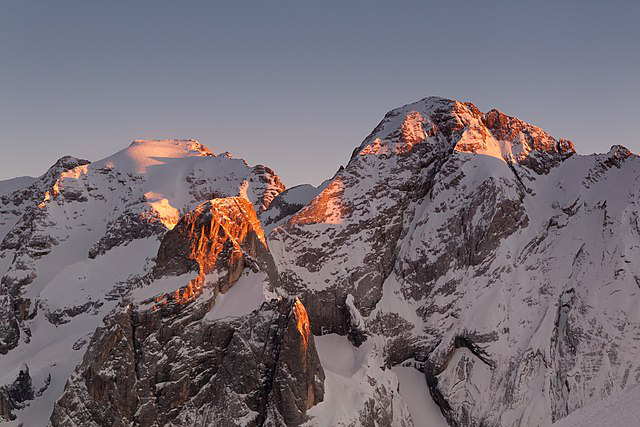

In [ ]:
image

In [ ]:
image.size

(640, 427)

In [ ]:
width, height = image.size
print(width, height)

640 427


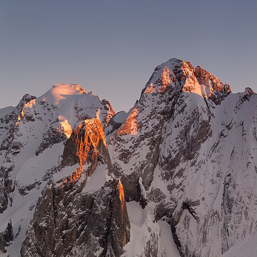

In [ ]:
image = image.resize((257, 257))
image

In [ ]:
image.size

(257, 257)

In [ ]:
type(image)

PIL.Image.Image

In [ ]:
image = np.array(image)

In [ ]:
type(image)

numpy.ndarray

In [ ]:
image

array([[[105, 117, 139],
        [105, 117, 139],
        [105, 117, 139],
        ...,
        [103, 110, 136],
        [104, 111, 137],
        [105, 112, 138]],

       [[104, 116, 138],
        [104, 116, 138],
        [104, 116, 138],
        ...,
        [104, 111, 137],
        [105, 112, 138],
        [105, 112, 138]],

       [[106, 118, 140],
        [106, 118, 140],
        [106, 118, 140],
        ...,
        [105, 112, 138],
        [105, 112, 138],
        [106, 113, 139]],

       ...,

       [[128, 119, 120],
        [143, 134, 132],
        [140, 129, 128],
        ...,
        [138, 126, 134],
        [138, 125, 134],
        [136, 123, 132]],

       [[138, 129, 130],
        [134, 125, 125],
        [135, 125, 124],
        ...,
        [137, 125, 133],
        [139, 126, 135],
        [136, 123, 132]],

       [[134, 125, 127],
        [134, 126, 126],
        [135, 127, 126],
        ...,
        [138, 125, 134],
        [138, 123, 133],
        [141, 125, 135]]

In [ ]:
image.shape

(257, 257, 3)

In [ ]:
image = np.expand_dims(image.astype(np.float32) / 255., axis = 0)

In [ ]:
image.shape

(1, 257, 257, 3)

In [ ]:
image

array([[[[0.4117647 , 0.45882353, 0.54509807],
         [0.4117647 , 0.45882353, 0.54509807],
         [0.4117647 , 0.45882353, 0.54509807],
         ...,
         [0.40392157, 0.43137255, 0.53333336],
         [0.40784314, 0.43529412, 0.5372549 ],
         [0.4117647 , 0.4392157 , 0.5411765 ]],

        [[0.40784314, 0.45490196, 0.5411765 ],
         [0.40784314, 0.45490196, 0.5411765 ],
         [0.40784314, 0.45490196, 0.5411765 ],
         ...,
         [0.40784314, 0.43529412, 0.5372549 ],
         [0.4117647 , 0.4392157 , 0.5411765 ],
         [0.4117647 , 0.4392157 , 0.5411765 ]],

        [[0.41568628, 0.4627451 , 0.54901963],
         [0.41568628, 0.4627451 , 0.54901963],
         [0.41568628, 0.4627451 , 0.54901963],
         ...,
         [0.4117647 , 0.4392157 , 0.5411765 ],
         [0.4117647 , 0.4392157 , 0.5411765 ],
         [0.41568628, 0.44313726, 0.54509807]],

        ...,

        [[0.5019608 , 0.46666667, 0.47058824],
         [0.56078434, 0.5254902 , 0.5176471 ]

# Executing the GAN

In [ ]:
models_links = {
    'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1',
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

In [ ]:
model_name = 'Boundless Quarter' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']

In [ ]:
model_path = models_links[model_name]

In [ ]:
model = hub.load(model_path)

In [ ]:
result = model.signatures['default'](tf.constant(image))

In [ ]:
result

{'default': <tf.Tensor: shape=(1, 257, 257, 3), dtype=float32, numpy=
 array([[[[0.41721573, 0.46096498, 0.54360247],
          [0.40607256, 0.462448  , 0.55367863],
          [0.40736657, 0.45504582, 0.5472404 ],
          ...,
          [0.4195348 , 0.46037903, 0.56050307],
          [0.4113462 , 0.4558077 , 0.5514159 ],
          [0.40357798, 0.43834442, 0.52909166]],
 
         [[0.40939686, 0.45583   , 0.550743  ],
          [0.4066564 , 0.4515337 , 0.5406082 ],
          [0.40274704, 0.45221168, 0.54348916],
          ...,
          [0.42190695, 0.4601134 , 0.56052893],
          [0.4255877 , 0.45962003, 0.55829287],
          [0.43117765, 0.46501815, 0.5662845 ]],
 
         [[0.4114918 , 0.45796853, 0.54808474],
          [0.4185257 , 0.4598235 , 0.5488432 ],
          [0.41599268, 0.46266916, 0.5492565 ],
          ...,
          [0.42550114, 0.45922402, 0.55594933],
          [0.42090136, 0.46281832, 0.5606818 ],
          [0.42617178, 0.46617278, 0.56922925]],
 
         ...

## Visualizing the results

In [ ]:
generated_image = result['default']
masked_image = result['masked_image']

In [ ]:
generated_image.shape, np.squeeze(generated_image).shape

(TensorShape([1, 257, 257, 3]), (257, 257, 3))

In [ ]:
def visualize_results(original_image, masked_image, generated_image):
  imgs = [original_image, masked_image, generated_image]
  title = ['Original image', 'Masked image', 'Generated image']
  plt.figure(figsize = (24,12))
  for i, img in enumerate(imgs):
    plt.subplot(1, 3, i + 1)
    plt.imshow((np.squeeze(img)))
    plt.title(title[i])
    plt.axis('off')
  plt.show()

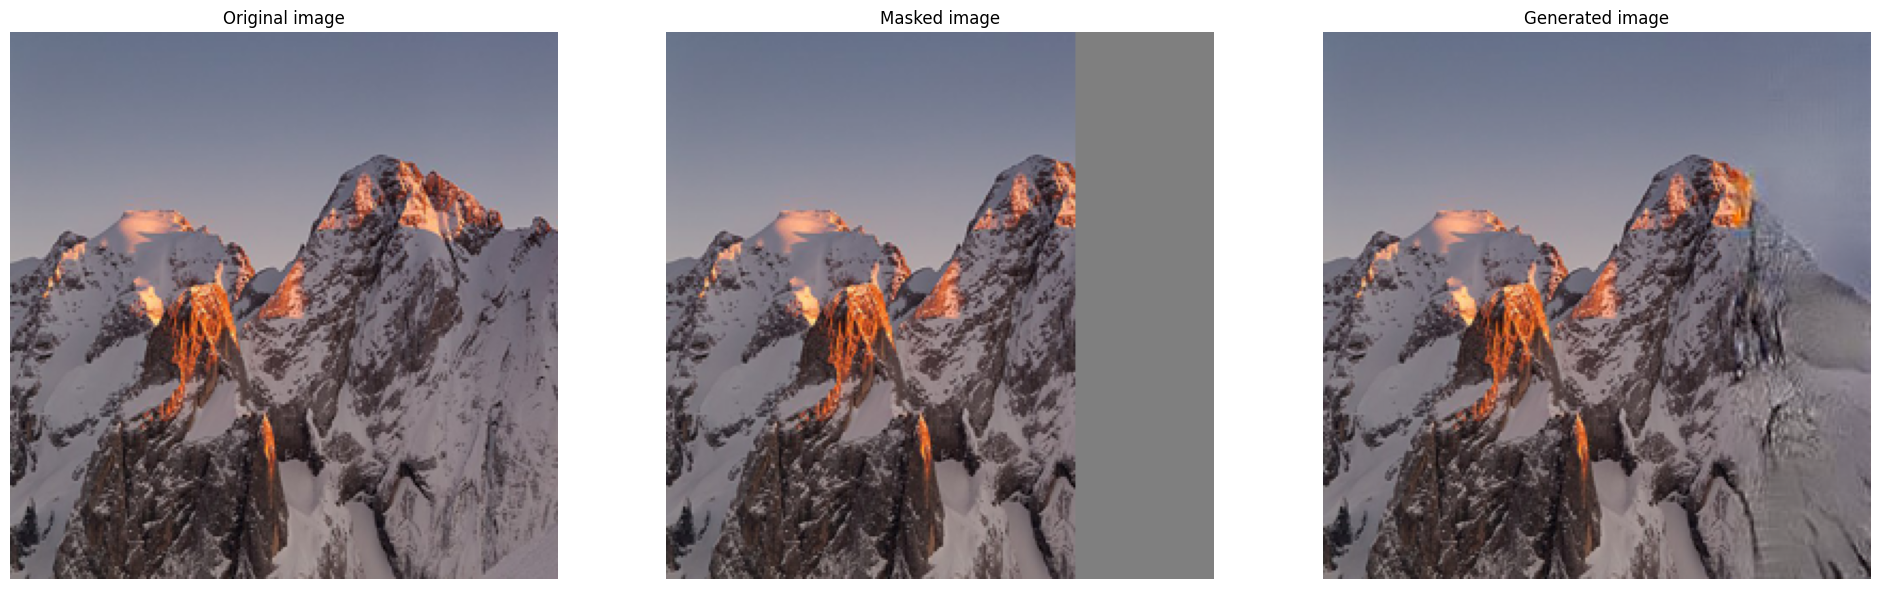

In [ ]:
visualize_results(image, masked_image, generated_image)

---

Based on: https://www.tensorflow.org/hub/tutorials/boundless